# <span style="color:#0b486b">SIT 112 - Data Science Concepts</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

---
## <span style="color:#0b486b">Practical Session 8: Data Dependency and Linear Regression</span>

**The purpose of this session is to demonstrate:**

1. Data Dependency
  1. Pearson's-r Correlation coefficient
  2. Spearman's rank coefficient
2. Linear Regression

---
## <span style="color:#0b486b">1. Pearson's-r Correlation coefficient</span>
We assume $X=\left\{ X_{1},\ldots,X_{n}\right\}$ and $Y=\left\{ Y_{1},\ldots,Y_{n}\right\}$. Then Pearson-r correlation coefficient is defined as 
$$ \rho(X,Y) = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y} =  \frac{\sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n(X_i-\bar{X})^2} \sqrt{\sum_{i=1}^n(Y_i-\bar{Y})^2}} $$

Use the car data and find the Pearson's-r correlation coefficient between car weights and fuel consumption.

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

%matplotlib inline

In [2]:
data = pd.read_csv('Auto.csv')

In [3]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


In [4]:
miles = data['miles']
weights = data['Weight']

In [5]:
print(miles[:10])
print(weights[:10])

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
5    18.1
6    14.3
7    24.4
8    22.8
9    19.2
Name: miles, dtype: float64
0    2.620
1    2.875
2    2.320
3    3.215
4    3.440
5    3.460
6    3.570
7    3.190
8    3.150
9    3.440
Name: Weight, dtype: float64


In [6]:
pearson_r = np.cov(miles, weights)[0, 1] / (miles.std() * weights.std())
print(pearson_r)

-0.867659376517


In [7]:
np.corrcoef(miles,weights)

array([[ 1.        , -0.86765938],
       [-0.86765938,  1.        ]])

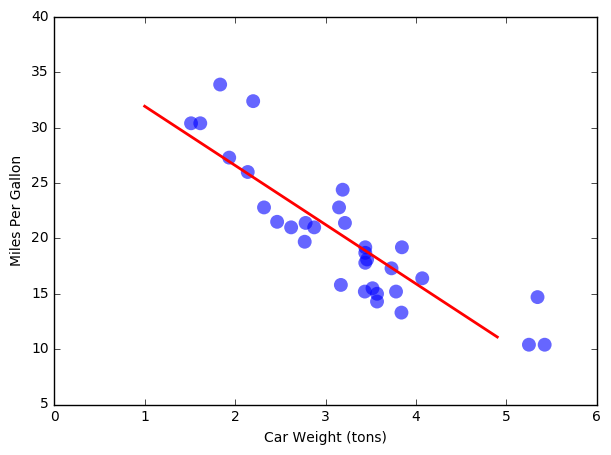

In [8]:
# plotting
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(weights,miles, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Car Weight (tons)')
ax.set_ylabel('Miles Per Gallon')

line_coef = np.polyfit(weights, miles, 1)
xx = np.arange(1, 5, 0.1)
yy = line_coef[0]*xx + line_coef[1]

ax.plot(xx, yy, 'r', lw=2)

**Exercise**: 

1. Find the Pearson's-r coefficient for two linearly dependent variables. Add some noise and see the effect of varying the noise. 
2. Simulate and visualize some data with positive linear correlation
3. Simulate and visualize some data with negative linear correlation. 

(0.98421102199644406, 1.633588136902306e-75)


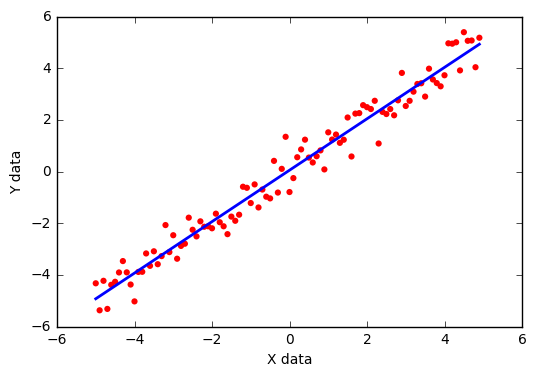

In [9]:
xx = np.arange(-5, 5, 0.1)
pp = 0.5  # level of noise
yy = xx + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='none')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')

line_coef = np.polyfit(xx, yy, 1)
line_xx = np.arange(-5, 5, 0.1)
line_yy = line_coef[0]*line_xx + line_coef[1]

ax.plot(line_xx, line_yy, 'b', lw=2)

print(scipy.stats.pearsonr(xx, yy))

Pearson's r coefficient is limited to analyze the linear correlation between two variables. It is not capable to show the non-linear dependency. Investigate the Pearson's r coefficient between two variables that are correlated non-linearly.

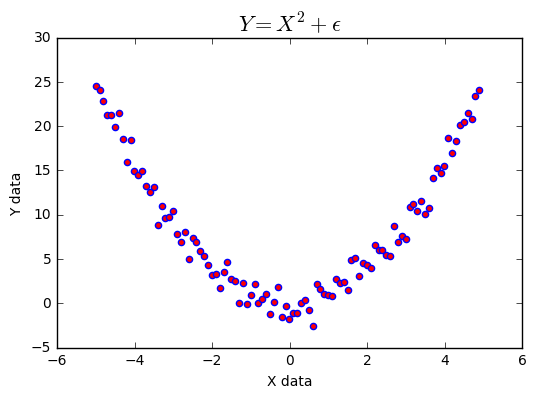

In [10]:
# generate some data, first for X
xx = np.arange(-5, 5, 0.1)

# assume Y = 2Y + some perturbation
pp = 1.1  # level of noise
yy = xx**2 + np.random.normal(0, pp, size=len(xx))

# visualize the data
fig, ax = plt.subplots()
ax.scatter(xx, yy, c='r', edgecolor='b')
ax.set_xlabel('X data')
ax.set_ylabel('Y data')
ax.set_title('$Y = X^2+\epsilon$', size=16)

The Pearson's-r correlation is near zero which means there is no linear correlation. But how about non-linear correlation? Isn't $y=x^2$?

In [11]:
np.corrcoef(xx,yy)

array([[ 1.        , -0.03331811],
       [-0.03331811,  1.        ]])

---
## <span style="color:#0b486b">1.2 Spearman's rank coefficient</span>

Spearman's rank coefficient is used for discrete data. Find the Spearman's rank between horse power and number of cylinders of the car data.

In [12]:
data.head()

,Model,miles,cylinder number,Engine displacement,Horse power,Weight
0,Mazda RX4,21.0,6,160.0,110,2.620
1,Mazda RX4 Wag,21.0,6,160.0,110,2.875
2,Datsun 710,22.8,4,108.0,93,2.320
3,Hornet 4 Drive,21.4,6,258.0,110,3.215
4,Hornet Sportabout,18.7,8,360.0,175,3.440


SpearmanrResult(correlation=0.90179093517084252, pvalue=1.8676856258444694e-12)


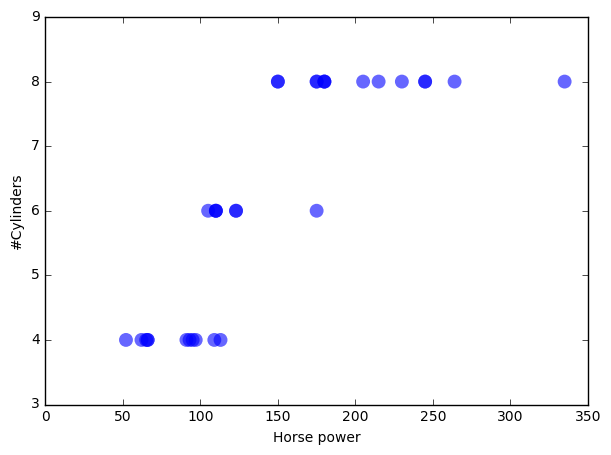

In [13]:
#horse = np.array([float(dd[4]) for dd in data[1:]])
#cylinder = np.array([float(dd[2]) for dd in data[1:]])
horse = data['Horse power']
cylinder = data['cylinder number']


fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.scatter(horse, cylinder, alpha=0.6, edgecolor='none', s=100)
ax.set_xlabel('Horse power')
ax.set_ylabel('#Cylinders')

print(scipy.stats.spearmanr(horse, cylinder))

---
## <span style="color:#0b486b">2. Linear Regression</span>


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

First we investigate a simple case by fitting a linear regression for three data points. First we simulate the data:

In [15]:
# simulating the data

x = np.c_[0, 1, 2].T
y  = [1, 1.96, 3.1]

print(x)
print(y)

[[0]
 [1]
 [2]]
[1, 1.96, 3.1]


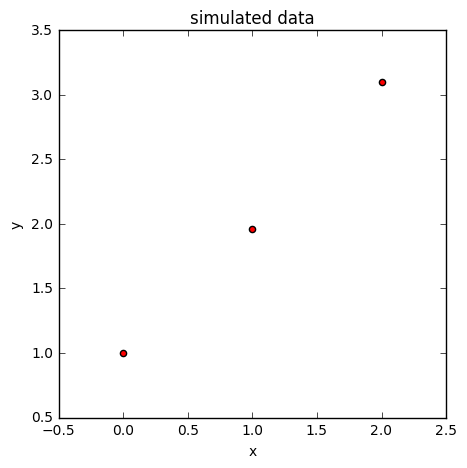

In [16]:
#plotting the data

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(x, y, c='r')
ax.set_title('simulated data')
ax.set_xlabel('x')
ax.set_ylabel('y')

Now we fit the linear regression:

In [17]:
from sklearn import linear_model

# instanciate the model
lr = linear_model.LinearRegression()

# fit the model
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("Residues:", lr._residues)

Coefficients: [ 1.05]
Intercept: 0.97
Residues: 0.0054


Let's plot the line to see how it estimates our data:

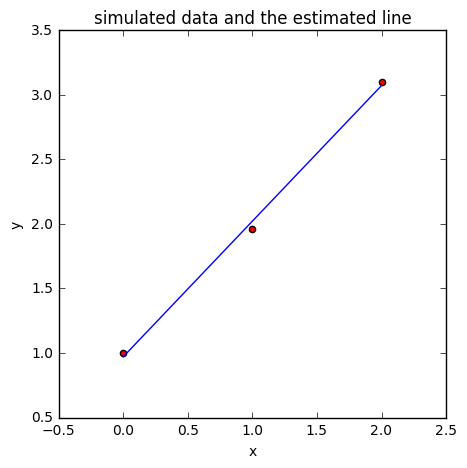

In [19]:
yhat = lr.predict(x)

fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
ax.scatter(x, y, c='r')
ax.plot(x, yhat)

ax.set_title('simulated data and the estimated line')
ax.set_xlabel('x')
ax.set_ylabel('y')

We can use the method `predict()` to predict `y` for a new `x`

In [20]:
x_test = np.c_[4, 2.3].T
y_test = lr.predict(x_test)

print(x_test.T)
print(y_test)

[[ 4.   2.3]]
[ 5.17   3.385]


### <span style="color:#0b486b">2.1 Multiple Linear Regression</span>


Multiple linear regression attempts to model the relationship between two or more explanatory variables and a response variable by fitting a linear equation to observed data. Every value of the independent variable x is associated with a value of the dependent variable y. For example if we have two explanatory variables (attributes, features), our data has such a form:

$$
D=\left\{ \left(\left(x_{1,1},x_{2,1}\right),y_{1}\right),\left(\left(x_{1,2},x_{2,2}\right),y_{2}\right),\ldots,\left(\left(x_{1,n},x_{2,n}\right),y_{n}\right)\right\} 
$$

Now we fit a multiple linear regression $y = x_1 + 2x_2 + 1$


In [21]:
# simulate the data

x = np.c_[[0, 0], [0, 1], [1, 1], [1, 0]].T
y = [1, 3, 4, 2]

print(x)
print(y)

[[0 0]
 [0 1]
 [1 1]
 [1 0]]
[1, 3, 4, 2]


In [22]:
mlr = linear_model.LinearRegression(fit_intercept=True)
mlr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print(mlr.coef_)
print(mlr.intercept_)

[ 1.  2.]
1.0


In [24]:
print(mlr._residues)

8.90207618739e-34


In [25]:
print(mlr.score(x,y))

1.0


**Exercises**: 

As the score suggests, now we have the perfect regression. Change the values of $y$ slightly and see what effect it has on the `mlr`.

### <span style="color:#0b486b">2.2 Regression for median house prices</span>


We are going to use the package `pandas` for reading and storing the data.

In [26]:
data = pd.read_csv('housing_300.csv')

In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.435446,15.386667,8.873600,0.09000,0.514333,6.420333,62.796667,4.279012,4.486667,312.043333,17.588333,378.708600,10.704167,25.484667
std,0.670445,25.968217,6.378924,0.28666,0.108867,0.706043,29.141200,1.980475,1.618194,69.105717,2.286012,43.328929,6.208806,8.887553
min,0.006320,0.000000,0.460000,0.00000,0.385000,4.903000,2.900000,1.321600,1.000000,188.000000,12.600000,70.800000,1.730000,11.800000
25%,0.068810,0.000000,4.050000,0.00000,0.437000,5.934500,36.600000,2.597450,4.000000,264.000000,15.600000,381.075000,5.907500,19.575000
50%,0.139950,0.000000,6.660000,0.00000,0.489000,6.249500,66.800000,3.945400,4.000000,307.000000,17.800000,392.215000,9.530000,23.100000
75%,0.522168,21.250000,10.590000,0.00000,0.547000,6.781250,91.350000,5.720900,5.000000,384.000000,19.100000,395.622500,14.112500,29.650000
max,4.097400,100.000000,25.650000,1.00000,0.871000,8.725000,100.000000,9.222900,8.000000,469.000000,21.200000,396.900000,34.410000,50.000000


Plot the scatter plot of the number of rooms vs the median house prices.

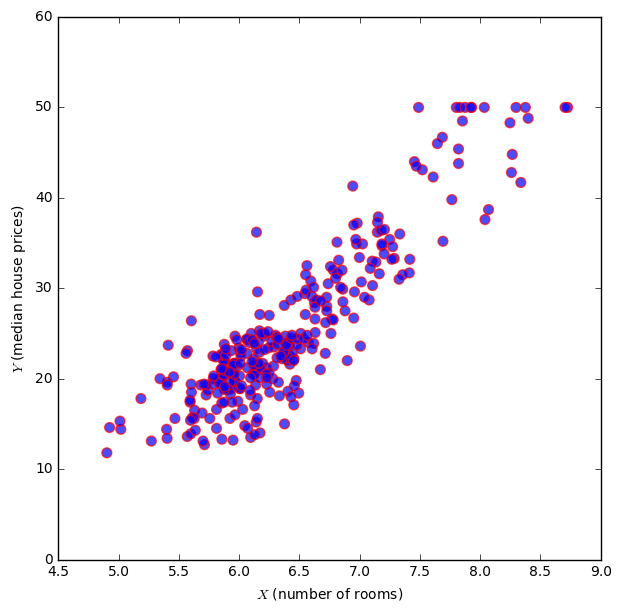

In [29]:
fig, ax = plt.subplots(figsize=(7, 7), dpi=100)
median_prices = data['MEDV']
avg_rooms = data['RM']
scales = 50*np.ones(len(median_prices))
ax.scatter(avg_rooms, median_prices, color='b',s=scales, alpha=0.7, edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

In [30]:
print(avg_rooms.shape)
print(median_prices.shape)

(300,)
(300,)


How correlated are the number of rooms and the price of the house?

In [31]:
np.corrcoef(avg_rooms, median_prices)

array([[ 1.        ,  0.89804265],
       [ 0.89804265,  1.        ]])

Now we want to fit a linear regression mode on the data.

In [32]:
# prepare the data

x = np.c_[avg_rooms.values]
y = median_prices.tolist()

In [33]:
# fit the model

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# obtain the model parameters

print(lr.coef_, lr.intercept_)

[ 11.30440747] -47.0933973969


In [35]:
# predict 

yhat = lr.predict(x)
print(yhat[:10])

[ 27.23308169  25.49220294  34.12877024  32.01484605  33.69920276
  25.59394261  20.86870028  22.67740548  16.56172104  20.77826503]


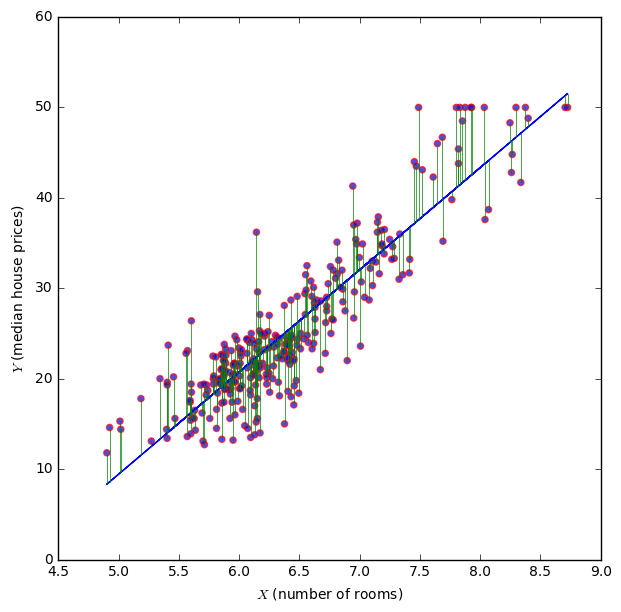

In [36]:
#plot the result

fig,ax = plt.subplots(figsize=(7,7),dpi=100)

scales = 20*np.ones(len(median_prices))
ax.scatter(avg_rooms,median_prices,color='b',s=scales,alpha=0.7,edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')

# plot the regression linear leared
ax.plot(x,yhat)

# visualize the residuals
tmp = np.reshape(x,[1,len(x)])[0]
tmp_x = []
tmp_y = []
for i in range(len(x)):
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,y[i])
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,yhat[i])
    ax.plot(tmp_x,tmp_y,color='g',linewidth=0.5)
    tmp_x = []
    tmp_y = []

check out the sum of residual:

In [37]:
lr._residues

4570.461732299088

It is customary to test your model on **unseen** data. So we divide our data into two parts. We use 70% of it to train the model and 30% to evaluate its performance on unseen data.

In [38]:
split = 0.7
split_idx = int(np.round(split * len(data)))
split_idx

210

In [39]:
train_data = data[0:200]
train_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


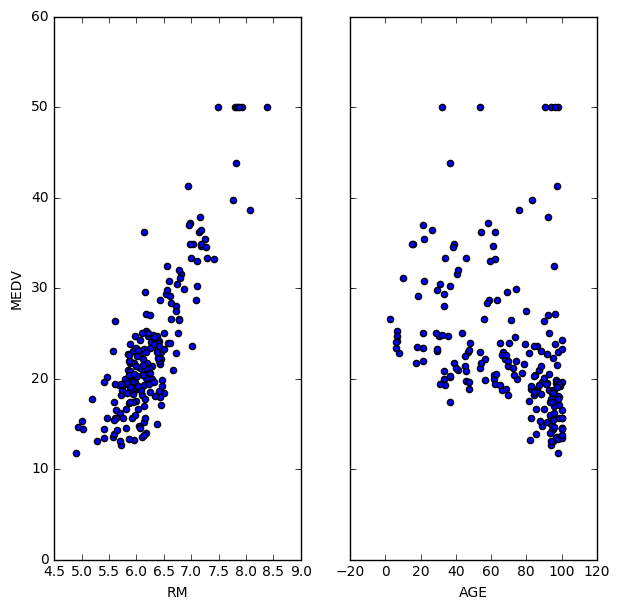

In [40]:
fig, axs = plt.subplots(1, 2, sharey=True)
train_data.plot(kind='scatter', x='RM', y='MEDV', ax=axs[0], figsize=(7, 7))
train_data.plot(kind='scatter', x='AGE', y='MEDV', ax=axs[1], figsize=(7, 7))

In [41]:
test_data = data[200:300]
test_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
200,0.01778,95.0,1.47,0,0.4030,7.135,13.9,7.6534,3,402,17.0,384.30,4.45,32.9
201,0.03445,82.5,2.03,0,0.4150,6.162,38.4,6.2700,2,348,14.7,393.77,7.43,24.1
202,0.02177,82.5,2.03,0,0.4150,7.610,15.7,6.2700,2,348,14.7,395.38,3.11,42.3
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0


In [42]:
train_X = train_data['RM'].values
train_X = np.c_[train_X]
train_Y = train_data['MEDV'].tolist()

test_X = test_data['RM'].values
test_X = np.c_[test_X]
test_Y = test_data['MEDV'].tolist()

In [43]:
print(type(train_X))
print(train_X.shape)
print(type(train_Y))

<class 'numpy.ndarray'>
(200, 1)
<class 'list'>


In [44]:
'''
Build a linear regression model from training data
'''
from sklearn import linear_model
lr = linear_model.LinearRegression()

lr.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
print(lr.coef_)
print(lr.intercept_)

[ 11.48585853]
-48.553067034


Now we plot the linear regression result and the data to see how it fits the training data:

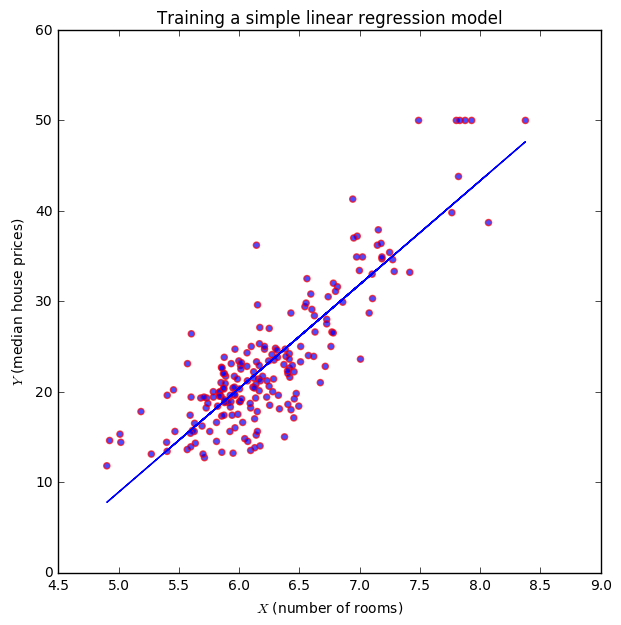

In [46]:
fig,ax = plt.subplots(figsize=(7,7),dpi=100)

# plot training data
scales = 20*np.ones(len(train_Y))
ax.scatter(train_X,train_Y,color='b',s=scales,alpha=0.7,edgecolor='r')
plt.xlabel('$X$ (number of rooms)')
plt.ylabel('$Y$ (median house prices)')
plt.title('Training a simple linear regression model')

# plot the regression line
train_Yhat = lr.predict(train_X)
plt.plot(train_X,train_Yhat)

Now that we have obtained the model parameters, we can use the model to predict for unseen data:

In [47]:
yhat_test = lr.predict(test_X)

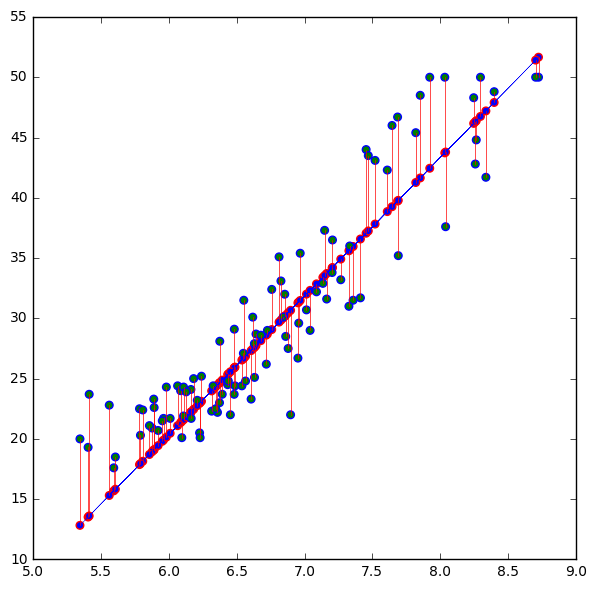

In [48]:
fig,ax = plt.subplots(figsize=(7,7),dpi=100)

# plot the predicted points along the prediction line
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,yhat_test,s=scales,color='b',edgecolor='r')
ax.plot(test_X,yhat_test,color='b',linewidth=.2)

# plot the true values
scales = 30*np.ones(len(test_X))
ax.scatter(test_X,test_Y,s=scales,color='g',edgecolor='b')

# plot the residual line
tmp = np.reshape(test_X,[1,len(test_X)])[0]
tmp_x = []
tmp_y = []
for i in range(len(test_X)):
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,yhat_test[i])
    tmp_x = np.append(tmp_x,tmp[i])
    tmp_y = np.append(tmp_y,test_Y[i])
    ax.plot(tmp_x,tmp_y,color='red',linewidth=0.5)
    tmp_x = []
    tmp_y = []